In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [2]:
file = h5py.File("Data/h5pytensors.hdf5", "r")
constants = file["Constants1"]
cellData = file["Cell_Data1"]
eventData = file["Event_Data1"]
clusterData = file["Cluster_Data1"]

In [3]:
keys = {
    "cell_x" : 0,
    "cell_y" : 1,
    "cell_z" : 2,
    "cell_eta" : 3,
    "cell_phi" : 4,
    "cell_subCalo" : 5,
    "cell_sampling" : 0,
    "cell_e" : 1,
    "cell_sigma" : 2,
    "cell_time" : 3,
    "cell_weight" : 4,
    "cell_truth" : 5,
    "cell_cluster_index" : 6,
    "cell_to_cluster_e" : 7,
    "cell_to_cluster_eta" : 8,
    "cell_to_cluster_phi" : 9,
    "cluster_e" : 0,
    "cluster_eta" : 1,
    "cluster_phi" : 2
}

In [4]:
def extractCellData(data):
    cell_samplingData = data[:, :, keys["cell_sampling"]]
    cell_eData = data[:, :, keys["cell_e"]]
    cell_sigmaData = data[:, :, keys["cell_sigma"]]
    cell_timeData = data[:, :, keys["cell_time"]]
    cell_weightData = data[:, :, keys["cell_weight"]]
    cell_truthData = data[:, :, keys["cell_truth"]]
    cell_cluster_indexData = data[:, :, keys["cell_cluster_index"]]
    cell_to_cluster_eData = data[:, :, keys["cell_to_cluster_e"]]
    cell_to_cluster_etaData = data[:, :, keys["cell_to_cluster_eta"]]
    cell_to_cluster_phiData = data[:, :, keys["cell_to_cluster_phi"]]

    return cell_samplingData, cell_eData, cell_sigmaData, cell_timeData, cell_weightData, cell_truthData, cell_cluster_indexData, cell_to_cluster_eData, cell_to_cluster_etaData, cell_to_cluster_phiData

In [5]:
def extractConstantsData(data):
    cell_xData = data[:, keys["cell_x"]]
    cell_yData = data[:, keys["cell_y"]]
    cell_zData = data[:, keys["cell_z"]]
    cell_etaData = data[:, keys["cell_eta"]]
    cell_phiData = data[:, keys["cell_phi"]]
    cell_subCaloData = data[:, keys["cell_subCalo"]]
    
    return cell_xData, cell_yData, cell_zData, cell_etaData, cell_phiData, cell_subCaloData

In [6]:
def extractClusterData(data):
    
    cluster_eData = data[:, :, keys["cluster_e"]]
    cluster_etaData = data[:, :, keys["cluster_eta"]]
    cluster_phiData = data[:, :, keys["cluster_phi"]]
        
    return cluster_eData, cluster_etaData, cluster_phiData

In [7]:
cell_x, cell_y, cell_z, cell_eta, cell_phi, cell_subCalo = extractConstantsData(constants)
cell_sampling, cell_e, cell_sigma, cell_time, cell_weight, cell_truth, cell_cluster_index, cell_to_cluster_e, cell_to_cluster_eta, cell_to_cluster_phi = extractCellData(cellData)
cluster_e, cluster_eta, cluster_phi = extractClusterData(clusterData)

In [8]:
cell_subCalo = np.array(cell_subCalo)
indices_tile = [i for i in range(len(cell_subCalo)) if cell_subCalo[i] == 3]

In [9]:
def countZeroesAndOnes(data):
    zeroes = 0
    ones = 0
    for datapoint in data:
        if datapoint == 0:
            zeroes = zeroes + 1
        elif datapoint == 1:
            ones = ones + 1
    return [zeroes, ones]

In [10]:
def makePieChart(data, title):
    plt.pie(countZeroesAndOnes(data), labels = ["Unmatched", "Matched"], autopct="%1.1f%%")
    plt.title(title)
    plt.show()

In [11]:
def makeBarChart(data, title):
    fig, ax = plt.subplots()
    
    ax.bar(["Unmatched", "Matched"], countZeroesAndOnes(data), color = ["tab:red", "tab:blue"])
    plt.ylabel("Number of Events")
    plt.title(title)
    plt.show()

In [12]:
def makeHist(name):
    plt.hist(tree.arrays()[name][0])
    plt.show()

In [13]:
def makeEnergyTruthArrays(truth, energy):
    falseEnergy = []
    trueEnergy = []
    for i in range(0, len(truth)):
        if truth[i] == 0:
            falseEnergy.append(energy[i])
        else:
            trueEnergy.append(energy[i])
    return falseEnergy, trueEnergy 

In [14]:
def normalize(hist):
    normalizedHist = hist/sum(hist)
    
    return normalizedHist

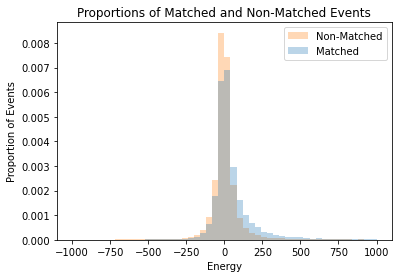

In [15]:
numBins = 50
falseEnergy, trueEnergy = makeEnergyTruthArrays(cell_truth[0], cell_e[0])
plt.hist(falseEnergy, bins = numBins, density = 1, range = (-1000, 1000), alpha = 0.3, color = "tab:orange", label = "Non-Matched")
plt.hist(trueEnergy, bins = numBins, density = 1, range = (-1000, 1000), alpha = 0.3, color = "tab:blue", label = "Matched")
plt.legend()
plt.xlabel("Energy")
plt.ylabel("Proportion of Events")
plt.title("Proportions of Matched and Non-Matched Events")
plt.show()

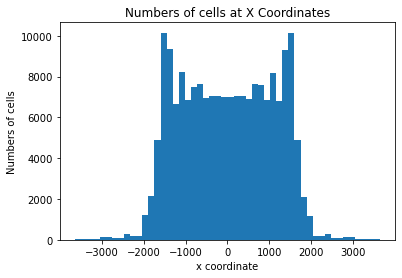

In [16]:
# cells contributing to a() cluster
#LAREM = 0, LARHEC = 1, LARFCAL = 2, TILE = 3, LARMINIFCAL = 4, NSUBCALO = 5,
plt.hist(cell_x, bins = numBins)
plt.xlabel("x coordinate")
plt.ylabel("Numbers of cells")
plt.title("Numbers of cells at X Coordinates")
plt.show()

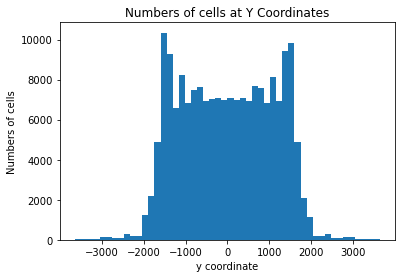

In [17]:
plt.hist(cell_y, bins = numBins)
plt.xlabel("y coordinate")
plt.ylabel("Numbers of cells")
plt.title("Numbers of cells at Y Coordinates")
plt.show()

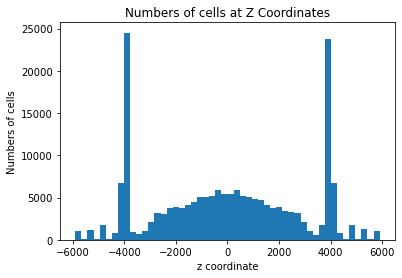

In [18]:
plt.hist(cell_z, bins = numBins)
plt.xlabel("z coordinate")
plt.ylabel("Numbers of cells")
plt.title("Numbers of cells at Z Coordinates")
plt.show()

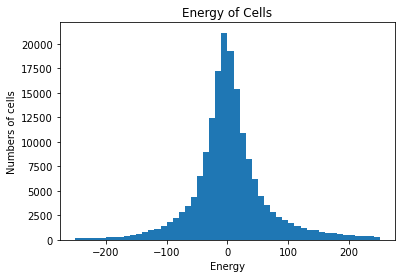

In [19]:
plt.hist(cell_e[0], range = (-250, 250), bins = numBins)
plt.xlabel("Energy")
plt.ylabel("Numbers of cells")
plt.title("Energy of Cells")
plt.show()

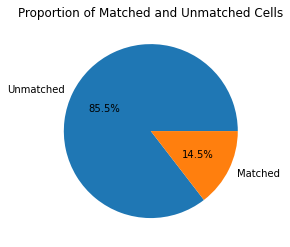

In [20]:
makePieChart(cell_truth[0], "Proportion of Matched and Unmatched Cells")

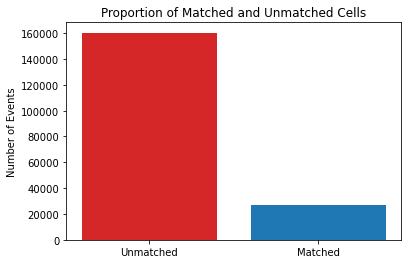

In [21]:
makeBarChart(cell_truth[0], "Proportion of Matched and Unmatched Cells")

In [22]:
cell_sigma = np.array(cell_sigma[0])
cell_time = np.array(cell_time[0])
cell_sigma_tile = cell_sigma[indices_tile]
cell_time_tile = cell_time[indices_tile]

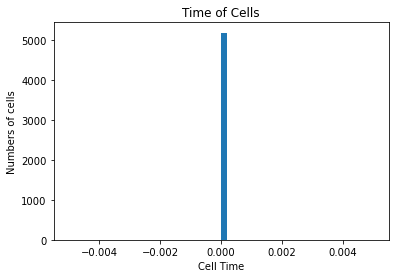

In [23]:
plt.hist(cell_time_tile, range = (-0.005, 0.005), bins = numBins)
plt.xlabel("Cell Time")
plt.ylabel("Numbers of cells")
plt.title("Time of Cells")
plt.show()

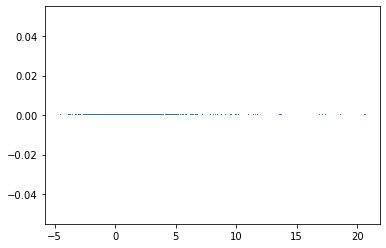

In [24]:
plt.plot(cell_sigma_tile, cell_time_tile, ',')
plt.show()

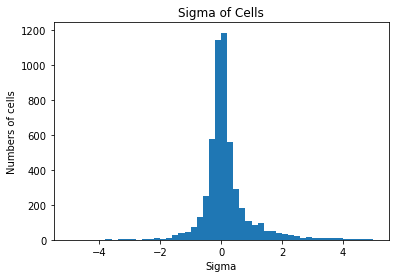

In [25]:
plt.hist(cell_sigma_tile, bins = numBins, range = (-5, 5))
plt.xlabel("Sigma")
plt.ylabel("Numbers of cells")
plt.title("Sigma of Cells")
plt.show()

In [26]:
indices_negE = [i for i in range(len(cell_e[0])) if cell_e[0][i] < 0]

In [27]:
cell_truth = np.array(cell_truth[0])
cellTruthwithNegE = cell_truth[indices_negE]

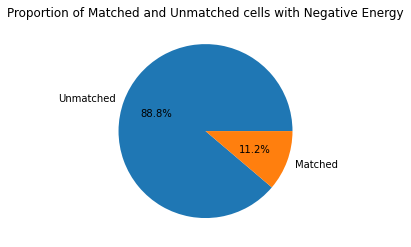

In [28]:
makePieChart(cellTruthwithNegE, "Proportion of Matched and Unmatched cells with Negative Energy")

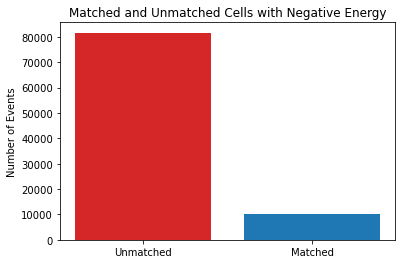

In [29]:
makeBarChart(cellTruthwithNegE, "Matched and Unmatched Cells with Negative Energy")

In [30]:
def makeEnergyMap(x, y, energy):
    fig, ax = plt.subplots()
    
    plot = ax.pcolormesh([x, y, energy], vmin = 0.0, vmax = 1.0)
    
    plt.colorbar(plot, label = "Energy normalized from 0 to 1")
    plt.xlabel("Eta")
    plt.ylabel("Phi")
    
    plt.show()

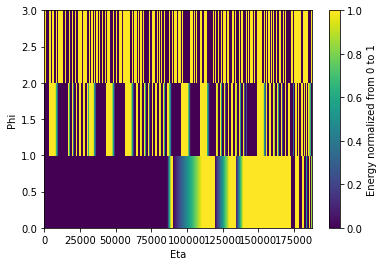

In [31]:
makeEnergyMap(cell_eta, cell_phi, cell_e[0])

In [32]:
def countClusters(data):
    clusterCount = []
    for event in data:
        count = 0
        for cluster in event:
            if cluster != 0:
                count = count + 1
        clusterCount.append(count)
    return clusterCount

In [33]:
clusterCounts = countClusters(cluster_e)

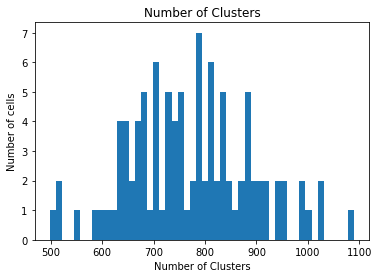

In [34]:
plt.hist(clusterCounts, bins = numBins)
plt.xlabel("Number of Clusters")
plt.ylabel("Number of cells")
plt.title("Number of Clusters")
plt.show()

In [44]:
def combineData(data):
    first = True
    for event in data:
        if first:
            combinedData = event
            first = False
        else:
            combinedData = np.concatenate((combinedData, event))
    return combinedData

In [45]:
combinedCellE = combineData(cell_e)

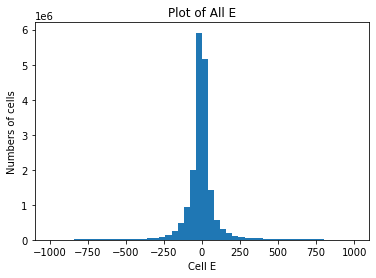

In [51]:
plt.hist(combinedCellE, range = (-1000, 1000), bins = numBins)
plt.xlabel("Cell E")
plt.ylabel("Numbers of cells")
plt.title("Plot of All E")
plt.show()